About diagnostic procedure:
## 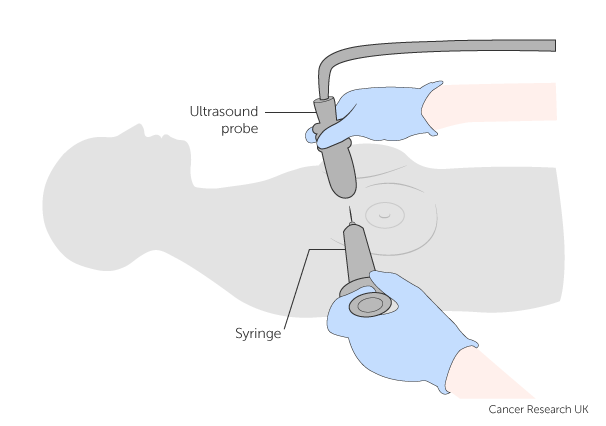




**Problem definition:**  
Breast cancer is a condition where the cell in breast grows abnormally. This disease is most common in women whereas this occurs rarely in men.In the United states breast cancer is the 2nd largest cancer-caused death.Breast cancer can be detected from breast Ultrasound, Breast MRI,breast mammogram and biopsy.Our dataset includes different features collected from breast biopsy i.e. Fine Needle Aspiration (FNA) of the breast. 



1.   A thin hallow needle is used to collect the mass of the breast to check the nature of the tissue lump or benign.If the lump is identified cystopathologist report is advised.
2. After archiving the cell, it is observed under the microscope



**Dataset:**


*   Breast Cancer Wisconsin (Diagnostic) Data Set is collected from [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).Dataset includes different features collected from breast biopsy i.e. Fine Needle Aspiration (FNA) of the breast. Features in the dataset describe characteristics of the cell nuclei present in the image.
* Dataset contains 561 instances with 32 features.



*Feature description:*


1) ID number.  
2) Diagnosis (M = malignant, B = benign).  
3-32).  

Ten real-valued features are computed for each cell nucleus:   

a) radius (mean of distances from center to points on the perimeter).  
b) texture (standard deviation of gray-scale values). 
c) perimeter. 
d) area. 
e) smoothness (local variation in radius lengths). 
f) compactness (perimeter^2 / area - 1.0).  
g) concavity (severity of concave portions of the contour). 
h) concave points (number of concave portions of the contour). 
i) symmetry. 
j) fractal dimension ("coastline approximation" - 1). 


## Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV


## Data loading

In [ ]:
#loading data using pandas
data = pd.read_csv('/content/drive/MyDrive/UCM projects/Sep-Dec 2022/Breast cancer/Dataset/Dataset/breast-cancer.csv')

In [ ]:
type(data)

pandas.core.frame.DataFrame

## Understanding data

In [ ]:
# displaying sample dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


**Inferences:**

⚛ There are no null values in the dataset     
⚛ In total there are 569 rows and 32 features.  
⚛ Only the target or diagnosis column is non integer or object column. 




In [ ]:
#dropping the id column
data.drop('id',axis=1,inplace = True)

In [ ]:
# remove spaces in columns name
data.columns = data.columns.str.replace(' ','_')
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#statistical view of the dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744



**Inference:**   
⚛ Since the data contains various ranges data should be normalised

In [ ]:
# number of classes
print('diagnosis classes:',data['diagnosis'].unique())
print('Number of classes:',len(data['diagnosis'].unique()))


diagnosis classes: ['M' 'B']
Number of classes: 2


## Exploratory data analysis(EDA)

In [ ]:
# targets distribution
targets = data['diagnosis'].unique()
distribution = data['diagnosis'].value_counts().to_numpy()

fig = go.Figure()
fig.add_trace(go.Pie(labels=targets, values=distribution))
fig.update_layout(autosize=False,width=400,
    height=400,title='Targets distribution')
fig.show()

**Inference:**  
Benign target variable is the dominant class.   
To fix the data imbalance:  
> We are going to use Grid search cross validation.   





In [ ]:


vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=data[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.3)


There are no considerable amount of  outliers in the radius, texture, area and perimeter mean category!








In [ ]:
#scatter plot
import plotly.express as px
df = data
fig = px.scatter_matrix(df, dimensions=["radius_se", "area_se", "texture_se", "perimeter_se"], color="diagnosis")
fig.show()

# Seperating targets and labels

In [ ]:
X = data.drop('diagnosis',axis=1) #labels
y = data['diagnosis'] # targets

## Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)


In [ ]:
# normalising the data using standard scaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# one label encoding the labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
le.inverse_transform([0,1])

array(['B', 'M'], dtype=object)

In [ ]:
print('shape train and test data:',X_train.shape,X_test.shape)

shape train and test data: (455, 30) (114, 30)


## Applying PCA

Principal Component Analysis (PCA) applied to this features and com (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

In [ ]:
#intializint the PCA object
pca_data = PCA(n_components=3) # 3 components are selected for better visualization

# fitting training and testing data
X_train = pca_data.fit_transform(X_train)
X_test = pca_data.transform(X_test)


In [ ]:
print('shape of the data after pca',X_train.shape)

shape of the data after pca (455, 3)


## 3D PCA Scatter Plot

In [ ]:
total_var = pca_data.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    X_train, x=0, y=1, z=2, color=y_train,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()


## Explained variance

In [ ]:
#explained variance ration for each component
pca_data.explained_variance_ratio_

array([0.44593522, 0.18545255, 0.09584641])

In [ ]:
exp_var_cumul = np.cumsum(pca_data.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

1.Logistic regression

In [ ]:

from sklearn.linear_model import LogisticRegression
#model object creation
lr = LogisticRegression()
#model training
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#predictions
y_pred_lr = lr.predict(X_test)

In [ ]:
#sample predictions
y_pred_lr[:5]

array([0, 1, 0, 0, 0])

In [ ]:
# test score
lr.score(X_test,y_test)

0.9473684210526315

**Results of Logistic regression**

In [ ]:
#classification report
print(classification_report(y_test,y_pred_lr,target_names=['B','M']))

              precision    recall  f1-score   support

           B       0.93      0.99      0.96        72
           M       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



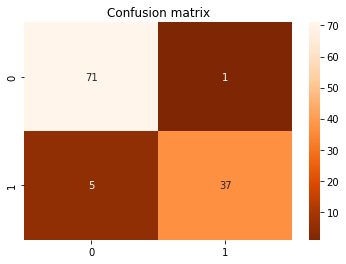

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred_lr)

#creating heat map for confusion matrix
sns.heatmap(cm,annot=True,cmap='Oranges_r')
plt.title('Confusion matrix')
plt.show()

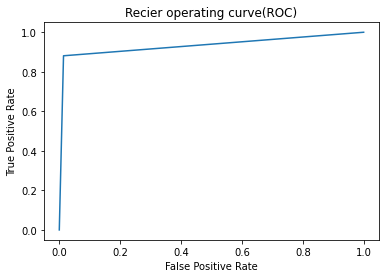

In [ ]:
#ROC curve
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_lr)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Recier operating curve(ROC)')
plt.show()


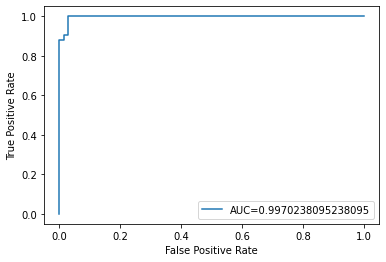

In [ ]:
#AUC curve
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

2.Support Vector Machine(SVM)

In [ ]:
#model object creation
svm = SVC(gamma='auto', probability=True)
#model training
svm.fit(X_train,y_train)

SVC(gamma='auto', probability=True)

In [ ]:
#predictions
y_pred_svm = svm.predict(X_test)

In [ ]:
#sample predictions
y_pred_svm[:5]

array([0, 1, 0, 0, 0])

In [ ]:
# test score
svm.score(X_test,y_test)

0.9385964912280702

Results of SVM

In [ ]:
#classification report
print(classification_report(y_test,y_pred_svm,target_names=['B','M']))

              precision    recall  f1-score   support

           B       0.92      0.99      0.95        72
           M       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



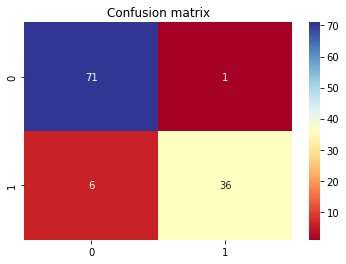

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred_svm)

#creating heat map for confusion matrix
sns.heatmap(cm,annot=True,cmap='RdYlBu')
plt.title('Confusion matrix')
plt.show()

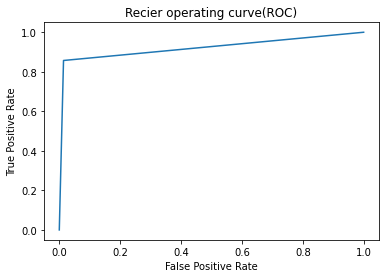

In [ ]:
#ROC curve
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_svm)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Recier operating curve(ROC)')
plt.show()


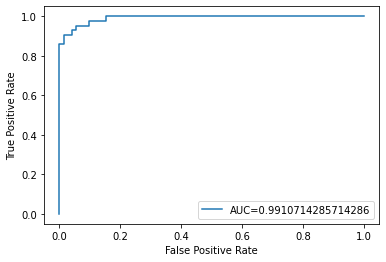

In [ ]:
#AUC curve
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## LDA(Linear discriminant Analysis)

In [ ]:
#performing LDA on train data
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# selecting the best hyper parameter for lda using gridsearch cv
grid=dict()
grid['solver']=['svd', 'lsqr', 'eigen']
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search=GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1 )

In [ ]:
parameters = search.fit(X_train,y_train)

In [ ]:
# best score
parameters.best_score_

0.9509661835748792

In [ ]:
parameters.best_params_

{'solver': 'svd'}

In sklearn svd is the default solver so training the model with svd solver

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
#Model accuracy on test data
model.score(X_test,y_test)

0.9473684210526315

In [ ]:
# Predictions
y_pred_lr1 = model.predict(X_test)

In [ ]:
# sample predictions
y_pred_lr1[:5]

array([0, 1, 1, 0, 0])

In [ ]:
# classification report
print(classification_report(y_test,y_pred_lr1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



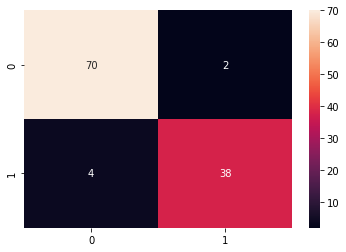

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr1),annot=True)
plt.show()

Support Vector Machine

In [ ]:
#model object creation
svm = SVC(gamma='auto', probability=True)
#model training
svm.fit(X_train,y_train)

SVC(gamma='auto', probability=True)

In [ ]:
#Model accuracy on test data
svm.score(X_test,y_test)

0.9473684210526315

In [ ]:
# Predictions
y_pred_svm1 = svm.predict(X_test)

In [ ]:
# sample predictions
y_pred_svm1[:5]

array([0, 1, 0, 0, 0])

In [ ]:
# classification report
print(classification_report(y_test,y_pred_svm1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



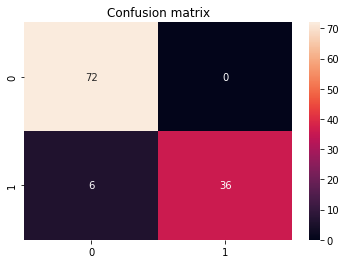

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_svm1),annot=True)
plt.title('Confusion matrix')
plt.show()

## Comparative Analysis